# <center>Tasks Assignment </center>

## Name : Sinead Frawley
## ID : G00376349

Jupyter notebook for researching, developing and documenting assessment task set for the GMIT module Machine Learning and Statistics.

## <center>*Task 1*</center>

This task is to write a function callled sqrt2 that calculates  and prints to the screen the square root of 2 to 100 decimal places. 

### <center>Research on Calculation Method</center>

The method taken to calculate sqaure root of two is the  **Newton Sqaure root method**

#### Newtonian Optimization

$$0 = f(x_0) + f'(x_0)(x_1 -x_0)$$

$$x_1 - x_0 = - \frac{f(x_0)}{f'(x_0)}$$ 

$$x_1 = x_0 -\frac{f(x_0)}{f'(x_0)} $$

"*Newtonian optimization is one of the basic ideas in optimization where function to be optimized is evaluated at a random point. Afterwards, this point is shifted in the negative direction of gradient until convergence.*"[[1]](https://medium.com/@sddkal/newton-square-root-method-in-python-270853e9185d)

$$a = x^2$$

For, 
$$f(x) = x^2 - a$$
$$f'(x)=x^2 -a $$
     
$$f(x) = 2x$$

$$\frac{f(x)}{f'(x)} = \frac{x^2 -a}{2x} = \frac{x -\frac{a}{x}}{2}$$

Since,

$$x_{n+1} - x_n = -\frac{f(x_n)}{f'(x_n)}$$

$$x_{n+1}   = x_n -\frac{x_n - \frac{a}{x_n}}{2}$$

$$x_{n+1}   = \frac{x_n - \frac{a}{x_n}}{2}$$

A classic algorithm that illustrates many of these concerns is “Newton’s” method to compute square
roots $x =√a$ for $a > 0$, i.e. to solve $x^2 = a$. The algorithm starts with some guess x1 > 0 and
computes the sequence of improved guesses [[2]](https://math.mit.edu/~stevenj/18.335/newton-sqrt.pdf )

$$x_{n+1} = \frac{1}{2}(x_{n} + \frac{a}{x_{n}})$$
.

In [1]:

def sqrt2( number_iters = 500):
    a = float(2) # number to get square root of
    for i in range(number_iters): # iteration number
        a = 0.5 * (a + 2 / a) # update
        
    print("{:.100f}".format(a))
  

  

In [2]:
sqrt2(2)

1.4166666666666665186369300499791279435157775878906250000000000000000000000000000000000000000000000000


The code from above is based on the function newton_method in [[1]](https://medium.com/@sddkal/newton-square-root-method-in-python-270853e9185d)

## <center>*Task 2*</center>

This Task is on The Chi-squared test for independence is a statistical hypothesis test like a t-test. It is used to analyse whether two categorical variables
are independent. The Wikipedia article gives the table below as an example [[7]](https://en.wikipedia.org/wiki/Chi-squared_test), stating the Chi-squared value based on it is approximately 24.6. I used  scipy.stats
to verify this value and calculated the associated p value. 

### <center>Research on Chi Sqaured Tests</center>

The chi-square test is often used to assess the significance (if any) of the differences among k different groups. The null and alternate hypotheses of the test, are generally written as:

H<sub>0</sub>: There is no significant difference between two or more groups.

H<sub>A</sub> There exists at least one significant difference between two or more groups.

The chi-square test statistic, denoted $x^2$, is defined as the following:[[3]](https://aaronschlegel.me/chi-square-test-independence-contingency-tables.html)

$$x^2=\sum_{i=1}^r\sum_{i=1}^k\frac{(O_{ij} -E_{ij})^2}{E_{ij}}$$

Where $Oi_{j}$ is the i-th observed frequency in the j-th group and $E_{ij}$ is the corresponding expected frequency. The expected frequency can be calculated using a common statistical analysis. The expected frequency, typically denoted $E_{cr}$, where c is the column index and r is the row index. Stated more formally, the expected frequency is defined as:



$$E_{cr}= \frac{(\sum_{i=0}^{n_r}r_i)((\sum_{i=0}^{n_c}c_i)}{n}$$

Where n is the total sample size and nc,nr are the number of cells in row and column, respectively. The expected frequency is calculated for each 'cell' in the given array.

### Analysis of data using Chi Squared Test

From the data in [[7]](https://en.wikipedia.org/wiki/Chi-squared_test) . I have created calulcation on chi sqaured test below


The two hypotheses are.

1. Area and type of worker are independent.
2. Area and type of worker are not independent.

In [3]:
import pandas as pd
data = {'A':[90, 30, 30, 150], 'B':[60, 50, 40, 150], 'C':[104, 51, 45, 200],
        'D':[95, 20, 35, 150], 'Total':[349, 151, 150, 650]}
df = pd.DataFrame(data,index=['White collar', 'Blue collar', 'No Collar', 'Total'])
df

,A,B,C,D,Total
White collar,90,60,104,95,349
Blue collar,30,50,51,20,151
No Collar,30,40,45,35,150
Total,150,150,200,150,650


In [4]:
obs = df.iloc[0:3, 0:4]
obs

,A,B,C,D
White collar,90,60,104,95
Blue collar,30,50,51,20
No Collar,30,40,45,35


#### Expected Results Table

Calculate "Expected Value" for each entry:
Multiply each row total by each column total and divide by the overall total:

In [5]:
df_exp = df.copy()

for i in range(3):
    for j in range(4):
        df_exp.iloc[i,j] = df_exp.iloc[-1,j]*df_exp.iloc[i,-1]/df_exp.iloc[-1,-1]
        j += 1
  
        
df_exp = df_exp.drop(['Total'], axis=1).drop(['Total'], axis=0)        
df_exp.round(2)

,A,B,C,D
White collar,80.54,80.54,107.38,80.54
Blue collar,34.85,34.85,46.46,34.85
No Collar,34.62,34.62,46.15,34.62


#### Partial Chi-squared value Results Table
Subtract expected from observed, square it, then divide by expected:
In other words, use formula  $\frac{(O-E)^2}{E}$ where

- O = Observed (actual) value 
- E = Expected value


In [6]:
df_chi = (obs.subtract(df_exp)**2)/df_exp
df_chi

,A,B,C,D
White collar,1.111527,5.237602,0.106678,2.596723
Blue collar,0.673968,6.590083,0.443327,6.325183
No Collar,0.615385,0.837607,0.028846,0.004274


Now add up those calculated values:

In [7]:
chi2_value = df_chi.sum().sum()
chi2_value.round(2)

24.57

### <center> Python chi square program </center>

In [8]:

from scipy.stats import chi2_contingency

import numpy as np
obs = np.array([[90, 60, 104,95], [30, 50, 51,20],[30,40,45,35]])
chi2_contingency(obs)


chi2_stat, p_val, dof, ex = chi2_contingency(obs)
print("===Chi2 Stat===")
print(chi2_stat)
print("\n")
print("===Degrees of Freedom===")
print(dof)
print("\n")
print("===P-Value===")
print(p_val)
print("\n")
print("===Contingency Table===")
print(ex)

===Chi2 Stat===
24.5712028585826


===Degrees of Freedom===
6


===P-Value===
0.0004098425861096696


===Contingency Table===
[[ 80.53846154  80.53846154 107.38461538  80.53846154]
 [ 34.84615385  34.84615385  46.46153846  34.84615385]
 [ 34.61538462  34.61538462  46.15384615  34.61538462]]


##### Calculate Critual Value

In [9]:
from scipy.stats import chi2
crit_value = chi2.ppf(q=0.95, df=6)
crit_value.round(2)

12.59

### Analytics of calculations 

 The calculate Chi-squared value 24.57 is higher than the critical value 12.59 for a 5% significance level and degrees of freedom in the sampled data.
 As a result  we can **reject the null hypotheses that the categories are independent of each other** 



## <center>**Task 3**<center>

### Standard Deviation

With Standard Deviation you can get a handle on whether your data are close to the average or they are spread out over a wide range. For example, if an teacher wants to determine if the grades in one of his/her class seem fair for all students, or if there is a great disparity, he/she can use standard deviation. To do that, he/she can find the average of the salaries in that department and then calculate the standard deviation. In general, a low standard deviation means that the data is very closely related to the average, thus very reliable and a high standard deviation means that there is a large variance between the data and the statistical average, thus not as reliable[[4]](https://towardsdatascience.com/using-standard-deviation-in-python-77872c32ba9b)


#### Population Standard Deviation 

$$\sigma = \frac{\sqrt{\sum(X_i - \mu)^2}}{N}$$

<center>$\sigma$ = population standard deviation </center>
<center>$\sum$ = sum of </center>
<center>$X_i$ = each value in the sample </center>
<center>$\mu$= population mean</center>
<center>N= number of values in the sample</center>

This standard deviation equation **Numpy** [[5]](https://towardsdatascience.com/why-computing-standard-deviation-in-pandas-and-numpy-yields-different-results-5b475e02d112)uses by default

#### Sample Stanadard Deviation

When data is collected  it is actually quite rare that we work with populations. It is more likely that we will be working with samples of populations rather than whole populations itself.thus better to use sample standard deviation equation . 

$$\sigma = \frac{\sqrt{\sum(X_i - \mu)^2}}{N - 1}$$

<center>$\sigma$ = population standard deviation </center>
<center>$\sum$ = sum of </center>
<center>$X_i$ = each value in the sample </center>
<center>$\mu$= population mean</center>
<center>N= number of values in the sample</center>

#### Diference between population and sample strandard deviation 

The difference is in the denominator of the equation. In sample standard deviation its divided by N- 1 instead of only using N as when compute population standard deviation.
The reason for this is that in statistics in order to get an unbiased estimator for population standard deviation when calculating it from the sample we should be using (N-1). This is called one degree of freedom, we subtract 1 in order to get an unbiased estimator.[[6]](https://towardsdatascience.com/why-computing-standard-deviation-in-pandas-and-numpy-yields-different-results-5b475e02d112)


#### So is sample standard devaition better to use ? 

 N-1 should be used  in order to get the unbiased estimator. And this is usually the case as mostly dealing with samples, not entire populations. This is why pandas default standard deviation is computed using one degree of freedom.
This may, however, may not be always the case so be sure what your data is before you use one or the other. 

##### Code samples to prove the case for sample stardard deviation 

####### Simulate population data

I had created a dataset using normal distribtion , only contain x values to simplify things .It has  N = 1,000,000 points  and its the  is 0.0, and the standard deviation is 1.0

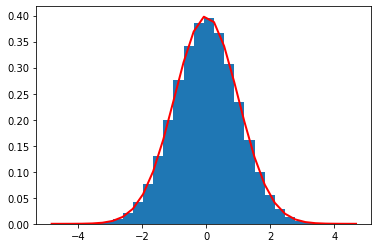

In [10]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
mu, sigma = 0, 1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000000)
count, bins, ignored = plt.hist(s, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2) ),linewidth=2, color='r')
plt.show()

### Calculate population stardard deviation of the entire sample

In [11]:
np.sqrt(np.sum((s - np.mean(s))**2)/len(s))

1.000188036804731

#### Dealing with a sample 

First create a subnet of the orginal sample 10 datapoints 

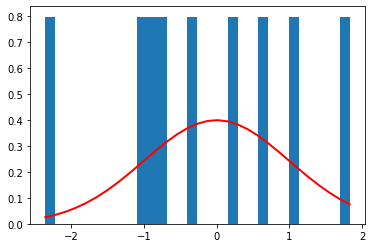

In [12]:
np.random.shuffle(s)
a = s[0:9]
count, bins, ignored = plt.hist(a, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2) ),linewidth=2, color='r')
plt.show()

This shows that the sample as why too small as its nothing like the population distribtion 

In [13]:
np.sqrt(np.sum((a - np.mean(a))**2)/(len(a) -1) )

1.2678407183521236

 Dataset of 100 data points 

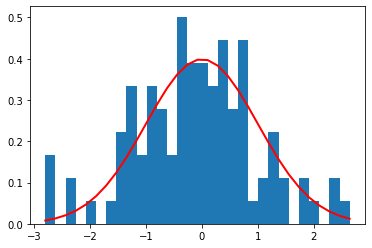

In [14]:
#sample of 100 data points
b = s[0:99]
count, bins, ignored = plt.hist(b, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2) ),linewidth=2, color='r')
plt.show()



The 100 data point distribution is more similar to the population distrubution 

In [15]:
# sample stardard deviation 
np.sqrt(np.sum((b - np.mean(b))**2)/(len(b) -1) )

1.100527713156102

Data set with 10000 data points 

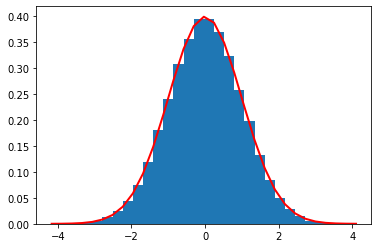

In [16]:
#sample of 100 data points
c = s[0:99999]
count, bins, ignored = plt.hist(c, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2) ),linewidth=2, color='r')
plt.show()


In [17]:
# sample stardard deviation 
np.sqrt(np.sum((c - np.mean(c))**2)/(len(c) -1 ) )

1.001174467425669

#### Analysis of results 

- Mostly sample standard deviation used for the MS Excel STDEV.S function does appear to produce a less bias standard deviation, but it not without bias and on occasion can provide a less accurate estimate of standard deviation. 
- If the sample is very small like the 10 data point sample can give inaccurate results as 10 point distribtuin can be nowhere near the distribution of the population as on the analysis above 
- As both the population size and sample proportion of the population increase, the accuracy of standard deviation calculation based on the sample improve and the close together both the STDEV.S and STDEV.P function method results become.

## Task 4

## Use scikit-learn to apply k-means clustering to Fisher’s famous Iris data set

### The iris dataset 

The features present in the dataset are:
- Sepal Width
- Sepal Length
- Petal Width
- Petal Length

Clustering is an unsupervisedlearning method that allows us to group set of objects based on similar characteristics. In general, it can help you find meaningful structure among your data, group similar data together and discover underlying patterns.
One of the most common clustering methods is K-means algorithm. The goal of this algorithm isto partition the data into set such that the total sum of squared distances from each point to the mean point of the cluster is minimized.[[6]](https://medium.com/@belen.sanchez27/predicting-iris-flower-species-with-k-means-clustering-in-python-f6e46806aaee)



K means works through the following iterative process:[[6]](https://medium.com/@belen.sanchez27/predicting-iris-flower-species-with-k-means-clustering-in-python-f6e46806aaee)
1. Pick a value for k (the number of clusters to create)
2. Initialize k ‘centroids’ (starting points) in your data
3. Create your clusters. Assign each point to the nearest centroid.
4. Make your clusters better. Move each centroid to the center of its cluster.
5. Repeat steps 3–4 until your centroids converge.

#### Iris Dataset 

The Iris Dataset consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). It has four features from each sample: length and width of sepals and petals.

In [18]:
# imports required for this part of the project 
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
import seaborn as sns

#### Explore the Data set

In [63]:
iris = datasets.load_iris()
df = pd.DataFrame(
    iris['data'], columns=iris['feature_names']
).assign(Species=iris['target_names'][iris['target']])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [46]:
df.shape

(150, 5)

We observe from this above line that our dataset has 150 rows and 5 columns

In [47]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'Species'],
      dtype='object')

In [48]:
# Further inspecting the dataframe
def inspect_data(data):
    return pd.DataFrame({"Data Type":data.dtypes,"No of Levels":data.apply(lambda x: x.nunique(),axis=0), "Levels":data.apply(lambda x: str(x.unique()),axis=0)})
inspect_data(df)

,Data Type,No of Levels,Levels
sepal length (cm),float64,35,[5.1 4.9 4.7 4.6 5. 5.4 4.4 4.8 4.3 5.8 5.7 5...
sepal width (cm),float64,23,[3.5 3. 3.2 3.1 3.6 3.9 3.4 2.9 3.7 4. 4.4 3...
petal length (cm),float64,43,[1.4 1.3 1.5 1.7 1.6 1.1 1.2 1. 1.9 4.7 4.5 4...
petal width (cm),float64,22,[0.2 0.4 0.3 0.1 0.5 0.6 1.4 1.5 1.3 1.6 1. 1...
Species,object,3,['setosa' 'versicolor' 'virginica']


More info on the dataset 

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Statistical Insights

In [50]:

df.describe(include='all')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,versicolor
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [51]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


We see all the columns of our data set are free from null values and four of them are numeric while one is a categorical column which also is seen by the dtypes function [[12]](https://towardsdatascience.com/eda-of-the-iris-dataset-190f6dfd946d)

#### Checking for Duplicate values

In [52]:
df.duplicated().sum() # Total no of duplicates in the dataset



1

In [55]:
df[df.duplicated()] #This shows the actual duplicate rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
142,5.8,2.7,5.1,1.9


There is only one duplicate in our dataset but removing it might break the balance of our dataset as we see that our dataset is balanced as in the describe function for the species column we saw the frequency of 50 which can be further proved by the following line of code like in the dataset in [[12]](https://towardsdatascience.com/eda-of-the-iris-dataset-190f6dfd946d)

#### Checking missing values

In [56]:
df.isnull().sum(axis=0)

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

### Estimating Skewness and Kurtosis

In [57]:
df.skew()

sepal length (cm)    0.314911
sepal width (cm)     0.318966
petal length (cm)   -0.274884
petal width (cm)    -0.102967
dtype: float64

In [58]:
df.kurt()

sepal length (cm)   -0.552064
sepal width (cm)     0.228249
petal length (cm)   -1.402103
petal width (cm)    -1.340604
dtype: float64

#### Visualisations on target column
Our target column is the species column because, in the end, we want to predict the correct species of flower.

c:\users\sinea\documents\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


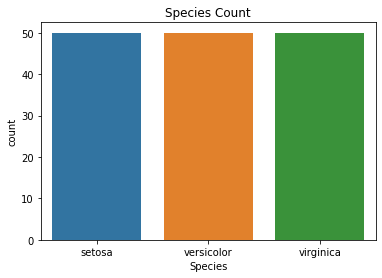

In [64]:
plt.title('Species Count')
sns.countplot(df['Species']);

This further tells that our dataset is balanced with equal records for all three species.

#### Visualising relations between variables
Let's compare the sepal length and sepal width columns.

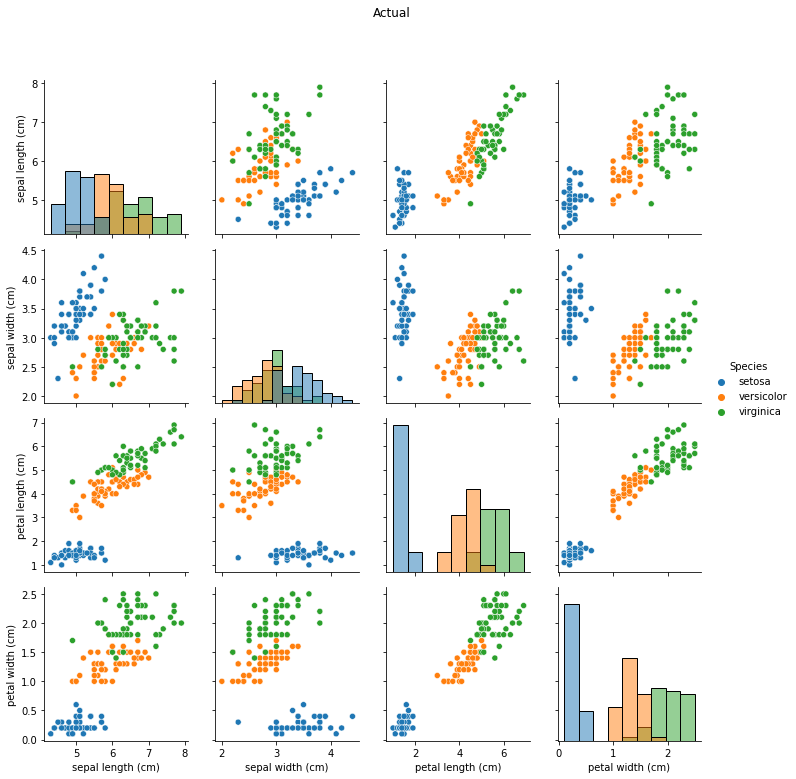

In [89]:
g = sns.PairGrid(df, hue="Species")
g.map_diag(sns.histplot)
g.fig.suptitle("Actual", y=1.08)
g.map_offdiag(sns.scatterplot)
g.add_legend()

- Setosa species has smaller sepal length but higher width.
- Versicolor lies in almost middle for length as well as width.
-  Virginica has larger sepal lengths and smaller sepal widths.
- Setosa has the smallest petal length as well as petal widths, 
- Versicolor has average petal length and petal width while the virginica species has the highest petal length as well as petal width.

setosa species has a large difference in its characteristics when compared to the other species, it has smaller petal width and length while its sepal width is high and its sepal length is low. Similar kind of conclusions can be drawn for the other species like the Versicolor species usually have average dimensions whether it is sepal or pedal. While virginica has high pedal width and length while it has small sepal width but large sepal length [[12]](https://towardsdatascience.com/eda-of-the-iris-dataset-190f6dfd946d)

### Summary of Numeric Features

In [68]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


We can see that the mean and median values don't have a large difference among their values so no data transformation is required.

### Correlation Between Variables

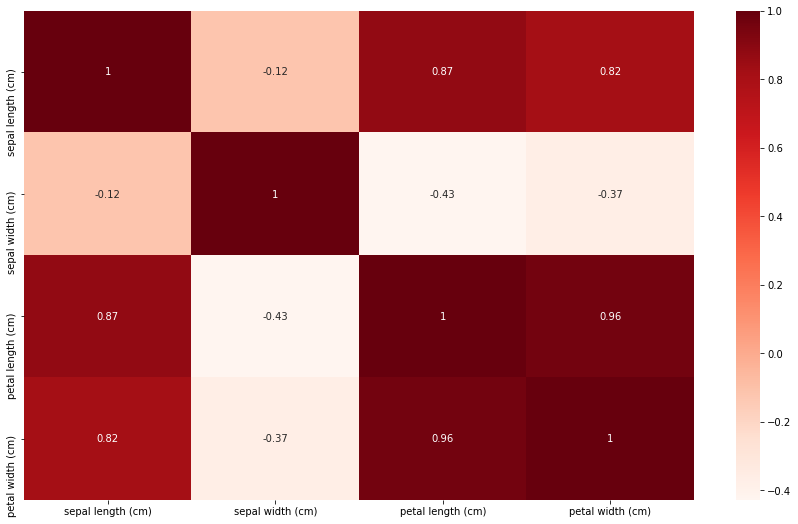

In [71]:
fig = plt.figure(figsize = (15,9))
sns.heatmap(df.corr(), cmap='Reds', annot = True);

From the above heatmap
- petal_length and petal_width have a high correlation.
- petal_width and sepal_length have good correlation
- petal_length and sepal_length have good correlations.


#### Histograms
Let's see the distribution of data for the various columns of our data set.

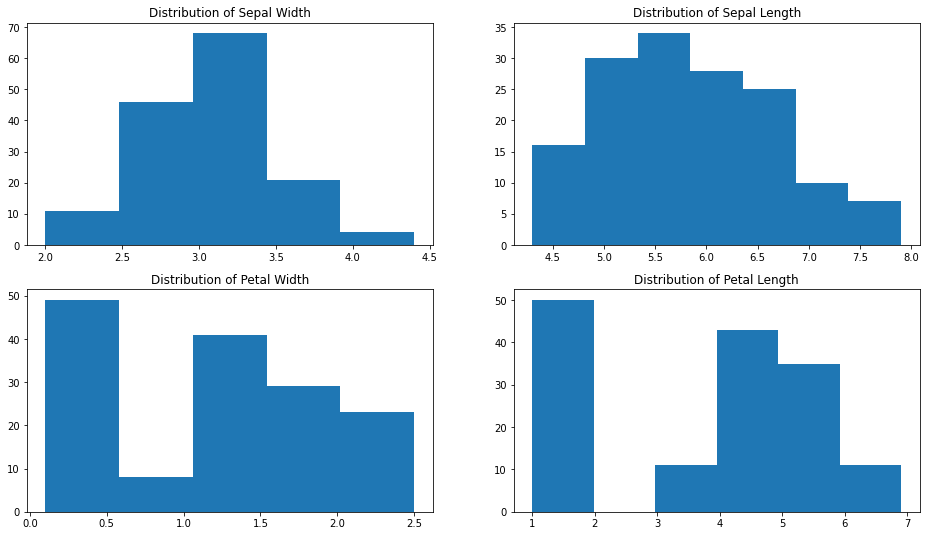

In [73]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))
axes[0,0].set_title("Distribution of Sepal Width")
axes[0,0].hist(df['sepal width (cm)'], bins=5);
axes[0,1].set_title("Distribution of Sepal Length")
axes[0,1].hist(df['sepal length (cm)'], bins=7);
axes[1,0].set_title("Distribution of Petal Width")
axes[1,0].hist(df['petal width (cm)'], bins=5);
axes[1,1].set_title("Distribution of Petal Length")
axes[1,1].hist(df['petal length (cm)'], bins=6);

- Highest frequency of sepal width is between 3.0 to 3.5 which is around 70.
- Highest frequency of sepal length is between 5.5 and 6.0 which is around 35.
- Highest frequency of petal width is between 0 to 0.5 which is around 50.
- Highest frequency of petal length is between 0 to 0.5 which is around 50.

### Univariate Analysis

c:\users\sinea\documents\venv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\sinea\documents\venv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\sinea\documents\venv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplo

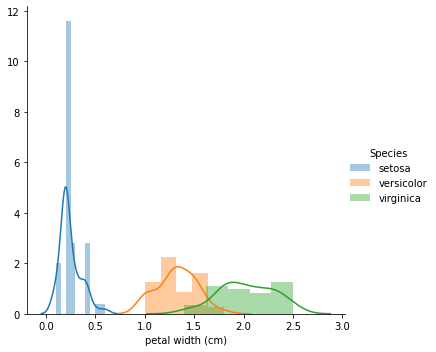

In [75]:
sns.FacetGrid(df,hue="Species",height=5).map(sns.distplot,"petal width (cm)").add_legend();

Setosa is easily separable while some portions of Versicolor and virginica are mixed.

c:\users\sinea\documents\venv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\sinea\documents\venv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\sinea\documents\venv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplo

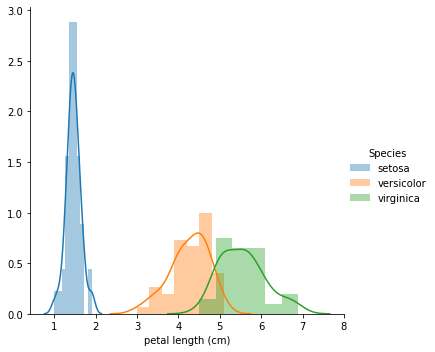

In [76]:
sns.FacetGrid(df,hue="Species",height=5).map(sns.distplot,"petal length (cm)").add_legend();

Again Setosa is easily separable while some portions of Versicolor and virginica are mixed.

c:\users\sinea\documents\venv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\sinea\documents\venv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\sinea\documents\venv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplo

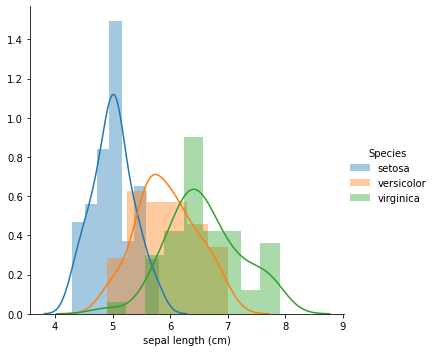

In [77]:
sns.FacetGrid(df,hue="Species",height=5).map(sns.distplot,"sepal length (cm)").add_legend();

Difficult to separate Speicies in the case of sepal lengh

c:\users\sinea\documents\venv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\sinea\documents\venv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\sinea\documents\venv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplo

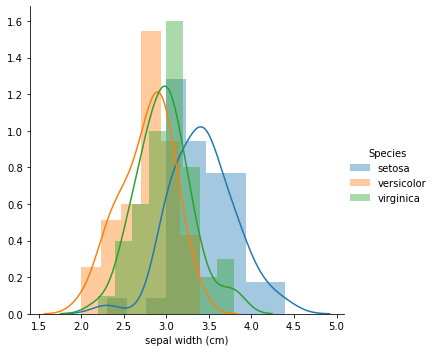

In [78]:
sns.FacetGrid(df,hue="Species",height=5).map(sns.distplot,"sepal width (cm)").add_legend();

Even more difficult to separate only on sepal width

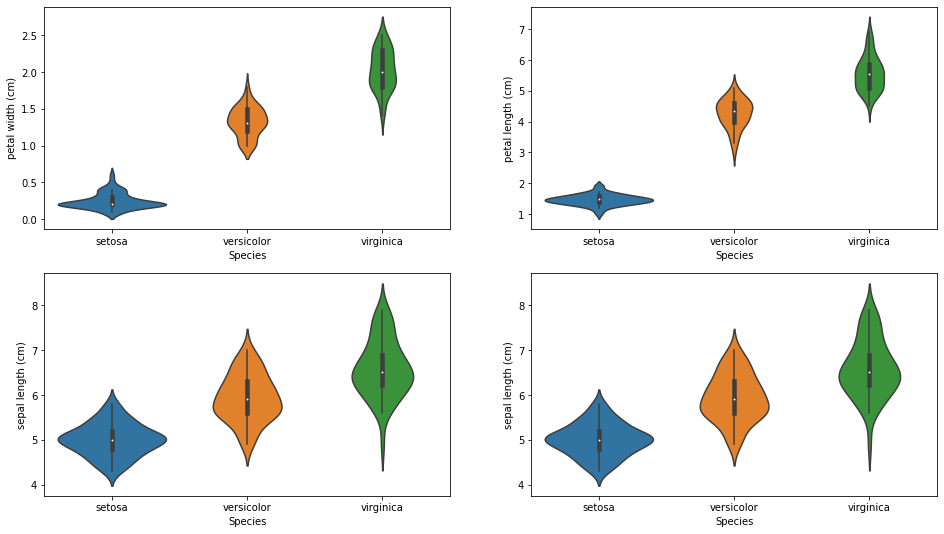

In [81]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))
sns.violinplot(  y="petal width (cm)", x= "Species", data=df,  orient='v' , ax=axes[0, 0])
sns.violinplot(  y="petal length (cm)", x= "Species", data=df,  orient='v' , ax=axes[0, 1])
sns.violinplot(  y="sepal length (cm)", x= "Species", data=df,  orient='v' , ax=axes[1, 0])
sns.violinplot(  y="sepal length (cm)", x= "Species", data=df,  orient='v' , ax=axes[1, 1])
plt.show()

- setosa usually has smaller features 
- The Versicolor species has average features
- The virginica species has the longest features widths and lengths as compared to others.

### Create Predicted Data

In [83]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)


### Elblow curve to test for the optimal number of clusters 

To get right number of cluster for K-means so we neeed to loop from 1 to 20 number of cluster and check score. Elbow method is used to represnt that. Got the code for this from [[10]](https://predictivehacks.com/k-means-elbow-method-code-for-python/)

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

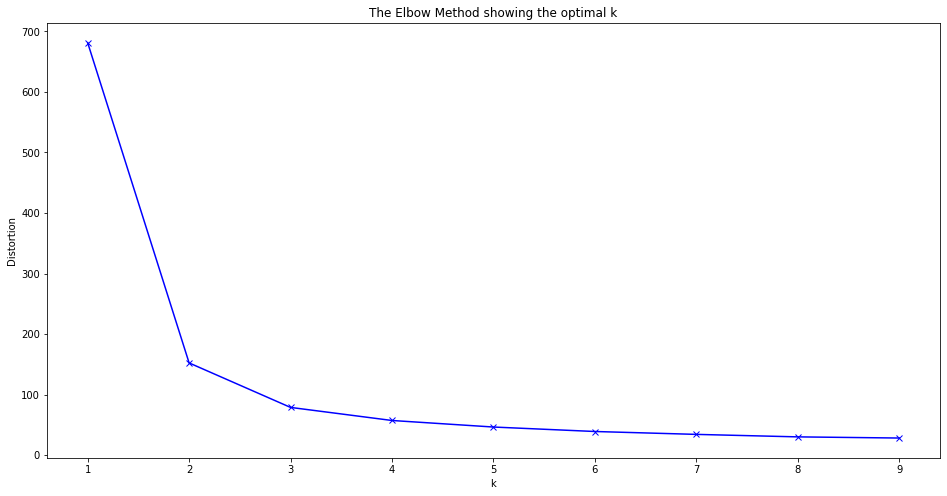

In [84]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(iris_df)
    distortions.append(kmeanModel.inertia_)
    plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

As we see 3 is optimal number of cluster where score has become constant. so fit and check cluster on 3 class cluster.

### Implement K Clustering with K=3

In [85]:
kmeans = KMeans(n_clusters=3)
predict = kmeans.fit_predict(iris_df)
kmeans.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [86]:
iris_df['cluster'] = kmeans.labels_


#### Visualisations on target column
Our target column is the cluster column because, 

c:\users\sinea\documents\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


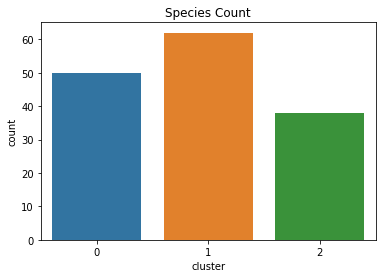

In [93]:
plt.title('Species Count')
sns.countplot(iris_df['cluster']);

This shows the kmeans clustering algorhtmn has no problem separating cluster 0 from the others , but sometimes gets in wrong between 1 and 2

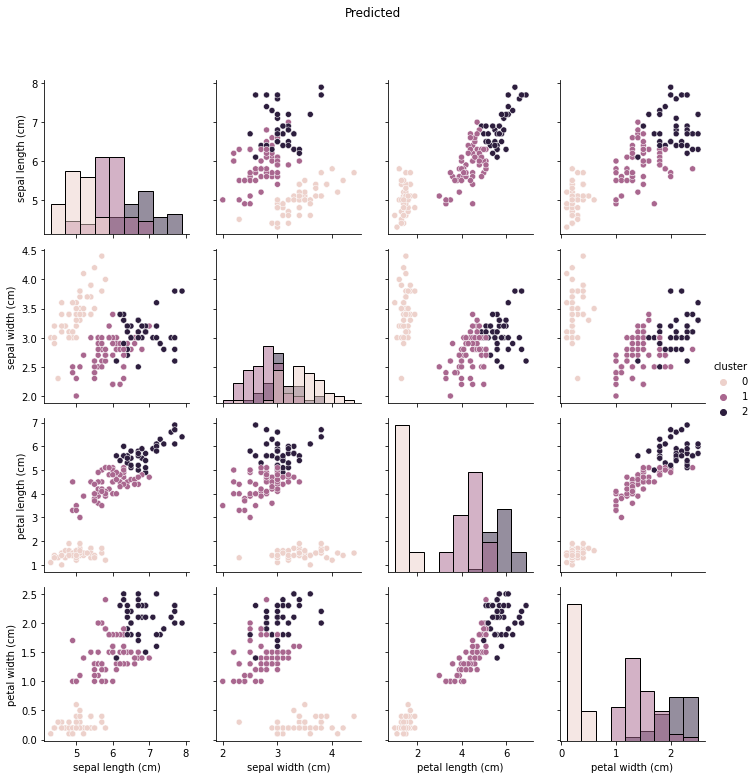

In [32]:

g = sns.PairGrid(df, hue="cluster")
g.map_diag(sns.histplot)
g.fig.suptitle("Predicted", y=1.08)
g.map_offdiag(sns.scatterplot)
g.add_legend()

- Cluster 0  has smaller sepal length but higher width.
-  Cluster1 lies in almost middle for length as well as width.
-  Cluster 2 has larger sepal lengths 
- Cluster 0  smallest petal length as well as petal widths, 
- Cluster 1  has average petal length and petal width .
- Cluster 2  has the highest petal length as well as petal width.

Cluster 0 species has a large difference in its characteristics when compared to the other species, it has smaller petal width and length while its sepal width is high and its sepal length is low. Similar kind of conclusions can be drawn for the other species like the Cluster 1 species usually have average dimensions whether it is sepal or pedal. While Cluster 2  has high pedal width and length while it has small sepal width but large sepal length 

Conclude that 
$$Cluster 0 = setosa$$
$$Cluster 1 = Versicolor$$
$$Cluster 2 = Vinginia$$

### Univariate Analysis on target predicted labels 

c:\users\sinea\documents\venv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\sinea\documents\venv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\sinea\documents\venv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplo

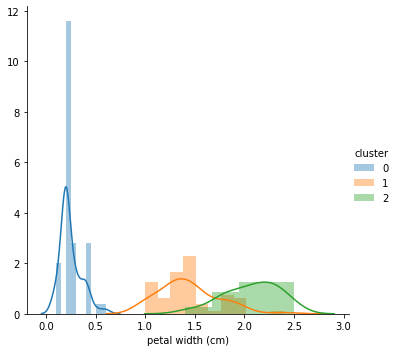

In [95]:
sns.FacetGrid(iris_df,hue="cluster",height=5).map(sns.distplot,"petal width (cm)").add_legend();

Like Setosa Cluster 0 is easily separable while some portions of Cluster 1 and Cluster 2 are mixed.

c:\users\sinea\documents\venv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\sinea\documents\venv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\sinea\documents\venv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplo

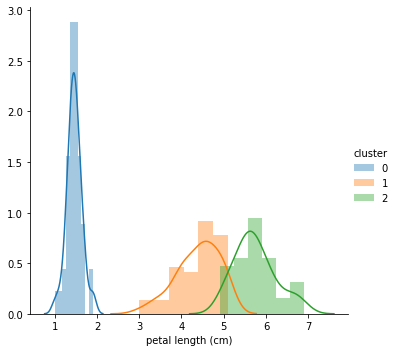

In [96]:
sns.FacetGrid(iris_df,hue="cluster",height=5).map(sns.distplot,"petal length (cm)").add_legend();

Similar to petal width Cluster 0 is easily separable while some portions of Cluster 1 and Cluster 2 are mixed.

c:\users\sinea\documents\venv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\sinea\documents\venv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\sinea\documents\venv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplo

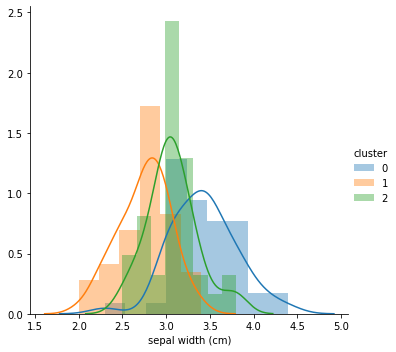

In [97]:
sns.FacetGrid(iris_df,hue="cluster",height=5).map(sns.distplot,"sepal width (cm)").add_legend();

Like actual labels its Difficult to separate Speicies in the case of sepal width

c:\users\sinea\documents\venv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\sinea\documents\venv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\sinea\documents\venv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplo

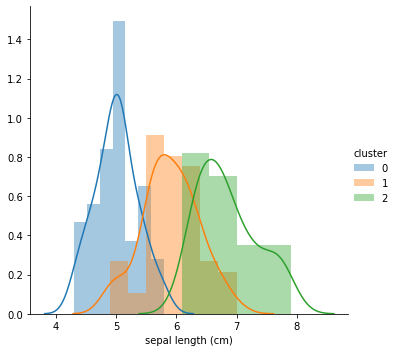

In [98]:
sns.FacetGrid(iris_df,hue="cluster",height=5).map(sns.distplot,"sepal length (cm)").add_legend();

In [ ]:
Difficult to separate Speicies in the case of sepal lengh

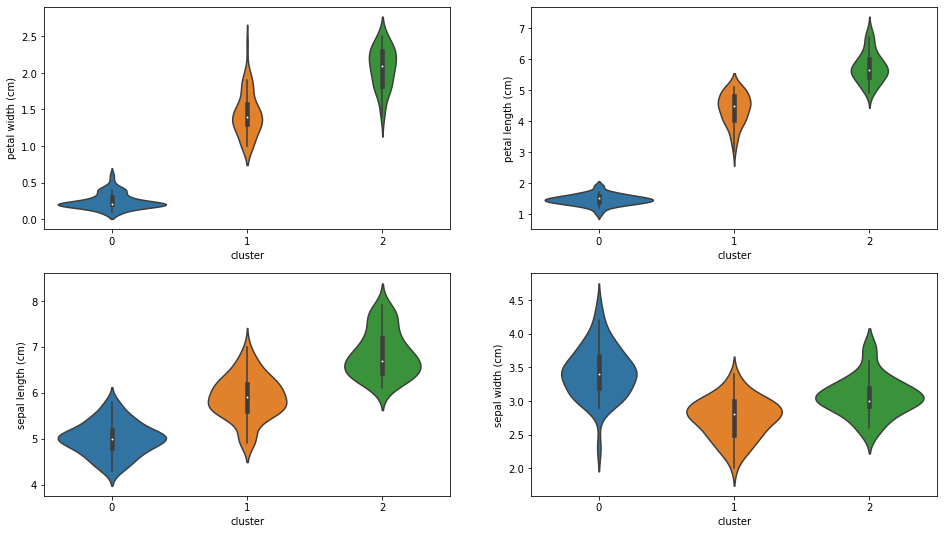

In [100]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))
sns.violinplot(  y="petal width (cm)", x= "cluster", data=iris_df,  orient='v' , ax=axes[0, 0])
sns.violinplot(  y="petal length (cm)", x= "cluster", data=iris_df,  orient='v' , ax=axes[0, 1])
sns.violinplot(  y="sepal length (cm)", x= "cluster", data=iris_df,  orient='v' , ax=axes[1, 0])
sns.violinplot(  y="sepal width (cm)", x= "cluster", data=iris_df,  orient='v' , ax=axes[1, 1])
plt.show()

- cluster 0 usually has smaller features 
- The Cluster 1 species has average features 
- The Cluster 2 species has the longest features widths and lengths as compared to others.

#### Here is a list of the main advantages and disadvantages of this algorithm.

###### Advantages:
- K-Means is simple and computationally efficient.
- It is very intuitive and their results are easy to visualize.
###### Disadvantages:
- K-Means is highly scale dependent and is not suitable for data of varying shapes and densities like in the case of Versicolor and 
- Evaluating results is more subjective. It requires much more human evaluation than trusted metrics.

### Conclusion 


- The actual dataset is balanced i.e. equal records are present for all three species but for pridicted labels records are around 50,60,40 respectively. 
- There is a strong correlation is present between petal width and petal length.
- The setosa species is the most easily distinguishable because of its small feature size and the kmeans algorithm predicted all these labels correcly 
-  Versicolor has average feature sizes
- Virginica has larger feature sizes.
- But kmeans algorithm sometimes mixed up Versicolor and Virginica so another type of algorithm  will need to implemented to predict these labels. 

## References 


1. Sıddık Açıl, May 6, 2018,Newton Square Root Method in Python,https://medium.com/@sddkal/newton-square-root-method-in-python-270853e9185d

2. S. G. Johnson, MIT Course 18.335,February 4, 2015,Square Roots via Newton’s Method,https://math.mit.edu/~stevenj/18.335/newton-sqrt.pdf

3. Aaron Schlegel, Mon 17 August 2020,Chi-Square Test of Independence for R x C Contingency Tables,https://aaronschlegel.me/chi-square-test-independence-contingency-tables.html

4. Reza Rajabi,Aug 15, 2019, Using Standard Deviation in Python, Mean, Standard deviation, and Error bar in Python,https://towardsdatascience.com/using-standard-deviation-in-python-77872c32ba9b

5. Magdalena Konkiewicz,Apr 29 2020,Why computing standard deviation in pandas and NumPy yields different results? Curious? Let’s talk about statistics, populations, and samples…, https://towardsdatascience.com/why-computing-standard-deviation-in-pandas-and-numpy-yields-different-results-5b475e02d112

6. Belen Sanchez,Oct 21, 2018,Predicting Iris Flower Specices With K-means Clustering in python, https://medium.com/@belen.sanchez27/predicting-iris-flower-species-with-k-means-clustering-in-python-f6e46806aaee

7. Wikipedia contributors, Chi-squared test — Wikipedia, the free encyclopedia,2020, https://en.wikipedia.org/wiki/Chi-squared_test

8. Brayton Hall, Aug 23,The Reasoning Behind Bessel’s Correction: n-1 And Why it’s Not Always a Correction,https://towardsdatascience.com/the-reasoning-behind-bessels-correction-n-1-eeea25ec9bc9?gi=e2f9b21b47e5

9. Scikit-Learn,K-means Clustering, https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html
10. Billy Bonaros, August 12, 2019,K-Means Elbow Method Code For Python,https://predictivehacks.com/k-means-elbow-method-code-for-python/

11. Dhiraj K, Oct 31, 2019, K-means clustering using sklearn and Python,https://heartbeat.fritz.ai/k-means-clustering-using-sklearn-and-python-4a054d67b187

12. Aditya Jetely, Oct 12, Yet Another Iris EDA An attempt to extract useful insights from the super popular iris dataset, https://towardsdatascience.com/eda-of-the-iris-dataset-190f6dfd946d



